In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import weatherdataprocesstool as wt

# 資料與標籤設定前提

月線操作法，每月底依據當月天氣平均資訊預測下個月漲跌

# 天氣數據前處理

In [12]:
#原始資料
df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea.pickle')
s1=df
s1['date2']=s1['year']+'-'+s1['mo']
s1['date2']=s1['date2'].astype('datetime64[ns]')
s1

,,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,count_slp,...,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date2
stn,date,,,,,,,,,,,,,,,,,,,,,
726580,1960-01-01,14922,1960,1,1,27.7,24,23.2,24,1021.8,24,...,0.31,G,999.9,0,0,1,0,0,0,1960-01-01
725377,1960-01-01,14804,1960,1,1,27.8,24,25.5,24,1030.0,8,...,0.00,I,999.9,1,0,0,0,0,0,1960-01-01
727450,1960-01-01,14913,1960,1,1,19.3,24,16.8,24,1024.0,24,...,0.20,G,11.0,1,0,1,0,0,0,1960-01-01
724296,1960-01-01,13841,1960,1,1,28.9,24,22.4,24,1027.7,8,...,0.00,I,999.9,0,0,0,0,0,0,1960-01-01
724285,1960-01-01,13812,1960,1,1,29.4,24,23.6,24,1028.8,8,...,0.00,I,999.9,0,0,0,0,0,0,1960-01-01
724338,1960-01-01,13802,1960,1,1,30.8,24,24.6,24,1023.5,8,...,0.00,I,999.9,0,0,0,0,0,0,1960-01-01
725300,1960-01-01,94846,1960,1,1,30.7,24,23.9,24,1026.2,24,...,0.00,G,999.9,0,0,0,0,0,0,1960-01-01
725310,1960-01-01,14806,1960,1,1,28.9,24,23.5,24,1025.9,8,...,0.00,I,999.9,0,0,0,0,0,0,1960-01-01
725335,1960-01-01,99999,1960,1,1,27.5,24,21.8,24,1026.8,8,...,0.00,I,999.9,0,0,0,0,0,0,1960-01-01


# 每月天氣平均資訊

In [13]:
# #極端天氣數據
# weatheCol=['fog','rain_drizzle','snow_ice_pellets','hail','thunder','tornado_funnel_cloud']
# short=pd.concat([wt.dataMean(df,i,['date']) for i in weatheCol],axis=1)

#一般天氣數據
# ['temp','max','min','dewp','slp','stp','visib','wdsp','mxpsd','prcp']
weatheCol2=['temp','dewp','slp','stp','visib','wdsp','mxpsd','prcp','fog','rain_drizzle','snow_ice_pellets','hail','thunder','tornado_funnel_cloud']
short2=pd.concat([wt.dataMean(s1,i,['date2']) for i in weatheCol2],axis=1)
# short2['extremeClimate']=short.T.sum()
short2=short2.reset_index()
short2['date2']=short2['date2'].shift(-1)#本月的數據到下月才能得知
short2=short2.set_index('date2')

df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_SOI&ONI.pickle')
short2=pd.concat([short2,df],axis=1).dropna()
short2

,temp,dewp,slp,stp,visib,wdsp,mxpsd,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,SOI,ONI
date2,,,,,,,,,,,,,,,,
1960-02-01,27.367624,21.691123,1019.667204,979.810950,8.628721,7.626501,13.527094,0.026858,0.455614,0.317232,0.408616,0.000000,0.006527,0.000000,0.1,-0.1
1960-03-01,26.256285,19.570391,1017.117241,977.316102,9.366061,8.845112,14.760364,0.032740,0.402235,0.205307,0.565642,0.000000,0.015363,0.000000,0.1,-0.1
1960-04-01,26.796110,18.887829,1020.847613,981.290102,9.747302,8.150690,14.685445,0.021071,0.353827,0.171895,0.473024,0.001255,0.016311,0.000000,1.0,-0.1
1960-05-01,52.524093,39.354404,1013.774267,975.550980,12.259456,9.540544,17.370855,0.043043,0.237047,0.415803,0.113990,0.002591,0.117876,0.000000,0.8,0.0
1960-06-01,59.221608,47.024749,1011.701290,973.929648,12.100000,8.023367,15.274749,0.051768,0.288945,0.496231,0.027638,0.001256,0.152010,0.000000,0.5,0.0
1960-07-01,68.770984,56.259715,1013.766533,976.364462,12.527591,7.126813,13.949223,0.048240,0.252591,0.448187,0.000000,0.005181,0.225389,0.000000,0.1,0.0
1960-08-01,72.932832,60.210025,1015.518839,978.256211,12.252882,5.344110,11.627604,0.030261,0.234336,0.322055,0.000000,0.001253,0.171679,0.000000,0.5,0.1
1960-09-01,73.615144,62.555194,1015.212129,978.001001,11.105257,6.029412,12.291615,0.046590,0.314143,0.347935,0.000000,0.000000,0.214018,0.000000,0.8,0.2
1960-10-01,67.330699,56.341969,1017.285733,979.701295,11.318394,5.287306,11.164637,0.031371,0.332902,0.332902,0.001295,0.001295,0.090674,0.000000,0.7,0.3


# YoY

In [14]:
#去除inf
import numpy as np
# basic_info=basic_info.replace([np.inf, -np.inf], 0)

# s=short2/short2.shift(12)
# short2=s.replace([np.inf, -np.inf], 0).dropna(how='all').fillna(0)
# short2

# 價格數據前處理

In [15]:
df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/RM_Price/rawMaterialPrice.pickle')
df2=df.reset_index()
#抽出月份
df2['date2']=df2['Date'].apply(lambda s:s.strftime('%Y%m'))
df2['M']=df2['date2'].apply(lambda s:s[4:])
df2=df2.set_index('stock_id')

dataset=[]
for i in ['cmeCorn'] :#'cmeCorn'
    df3=df2.loc[i]
    df3['date2']=df3['date2'].apply(lambda s:pd.to_numeric(s, errors='coerce'))
    df3['YM-2']=df3['date2'].shift(1)
    df3['newMonth']=(df3['date2']-df3['YM-2']).fillna(1)#解決12越跨一月的問題
    upAndDownS=df3[df3['newMonth']!=0]#留每月第一日的價格
    upAndDownS['nextMonthClose']=upAndDownS['Close'].shift(-1)
    upAndDownS['return']=upAndDownS['nextMonthClose']/upAndDownS['Close']
    upAndDownS=upAndDownS[~upAndDownS['return'].isna()]
    upAndDownS['win']=upAndDownS['return'].apply(lambda s:1 if s>1 else 0)
    dataset.append(upAndDownS)
    
upAndDownS=pd.concat(dataset)
upAndDownS
#每月第一日的價格統一改為1號
upAndDownS['date2']=upAndDownS['date2'].astype(str).apply(lambda s:s[:4]+'-'+s[4:]).astype('datetime64[ns]')
upAndDownS=upAndDownS.reset_index()
upAndDownS=upAndDownS.set_index('date2')
upAndDownS


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,stock_id,Date,Open,High,Low,Close,Volume,M,YM-2,newMonth,nextMonthClose,return,win
date2,,,,,,,,,,,,,
1960-10-01,cmeCorn,1960-10-01,137.71001,137.71001,136.98000,136.98000,0.0,10,NaN,1.0,135.16000,0.986713,0
1960-11-01,cmeCorn,1960-11-01,136.98000,136.98000,135.16000,135.16000,0.0,11,196010.0,1.0,132.97000,0.983797,0
1960-12-01,cmeCorn,1960-12-01,135.16000,135.16000,132.97000,132.97000,0.0,12,196011.0,1.0,122.04000,0.917801,0
1961-01-01,cmeCorn,1961-01-01,132.97000,132.97000,122.04000,122.04000,0.0,01,196012.0,89.0,122.77000,1.005982,1
1961-02-01,cmeCorn,1961-02-01,122.04000,122.77000,122.04000,122.77000,0.0,02,196101.0,1.0,123.13000,1.002932,1
1961-03-01,cmeCorn,1961-03-01,122.77000,123.13000,122.77000,123.13000,0.0,03,196102.0,1.0,123.86000,1.005929,1
1961-04-01,cmeCorn,1961-04-01,123.13000,123.86000,123.13000,123.86000,0.0,04,196103.0,1.0,118.03000,0.952931,0
1961-05-01,cmeCorn,1961-05-01,123.86000,130.42000,118.03000,118.03000,0.0,05,196104.0,1.0,124.95000,1.058629,1
1961-06-01,cmeCorn,1961-06-01,118.03000,124.95000,118.03000,124.95000,0.0,06,196105.0,1.0,129.33000,1.035054,1


# 天氣特徵與價格報酬率標籤合併

In [17]:
dataset_rmoutliers=short2.reindex(upAndDownS.index).fillna(method='ffill').fillna(method='bfill')
dataset_rmoutliers=short2
dataset_rmoutliers['return']=upAndDownS['return']
dataset_rmoutliers['win']=upAndDownS['win']
dataset_rmoutliers


,temp,dewp,slp,stp,visib,wdsp,mxpsd,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,SOI,ONI,return,win
date2,,,,,,,,,,,,,,,,,,
1960-02-01,27.367624,21.691123,1019.667204,979.810950,8.628721,7.626501,13.527094,0.026858,0.455614,0.317232,0.408616,0.000000,0.006527,0.000000,0.1,-0.1,NaN,NaN
1960-03-01,26.256285,19.570391,1017.117241,977.316102,9.366061,8.845112,14.760364,0.032740,0.402235,0.205307,0.565642,0.000000,0.015363,0.000000,0.1,-0.1,NaN,NaN
1960-04-01,26.796110,18.887829,1020.847613,981.290102,9.747302,8.150690,14.685445,0.021071,0.353827,0.171895,0.473024,0.001255,0.016311,0.000000,1.0,-0.1,NaN,NaN
1960-05-01,52.524093,39.354404,1013.774267,975.550980,12.259456,9.540544,17.370855,0.043043,0.237047,0.415803,0.113990,0.002591,0.117876,0.000000,0.8,0.0,NaN,NaN
1960-06-01,59.221608,47.024749,1011.701290,973.929648,12.100000,8.023367,15.274749,0.051768,0.288945,0.496231,0.027638,0.001256,0.152010,0.000000,0.5,0.0,NaN,NaN
1960-07-01,68.770984,56.259715,1013.766533,976.364462,12.527591,7.126813,13.949223,0.048240,0.252591,0.448187,0.000000,0.005181,0.225389,0.000000,0.1,0.0,NaN,NaN
1960-08-01,72.932832,60.210025,1015.518839,978.256211,12.252882,5.344110,11.627604,0.030261,0.234336,0.322055,0.000000,0.001253,0.171679,0.000000,0.5,0.1,NaN,NaN
1960-09-01,73.615144,62.555194,1015.212129,978.001001,11.105257,6.029412,12.291615,0.046590,0.314143,0.347935,0.000000,0.000000,0.214018,0.000000,0.8,0.2,NaN,NaN
1960-10-01,67.330699,56.341969,1017.285733,979.701295,11.318394,5.287306,11.164637,0.031371,0.332902,0.332902,0.001295,0.001295,0.090674,0.000000,0.7,0.3,0.986713,0.0


In [18]:
# dataset_rmoutliers.to_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea_YoY_traindata.pickle')

# SOI&ONI處理

In [19]:
# ONI=pd.read_csv('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/ONI.csv',index_col='Year')
# ONI=ONI.iloc[1:,]
# d=pd.concat([ONI.loc[y] for y in ONI.index])
# d=d.dropna()
# d

In [20]:
# SOI=pd.read_csv('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/SOI.csv')
# SOI=SOI.iloc[:]
# SOI['ONI']=d.values.tolist()
# SOI['date2']=SOI['Date'].astype(str).apply(lambda s:s[:4]+'-'+s[4:]).astype('datetime64[ns]')
# SOI=SOI.set_index('date2')
# SOI=SOI.shift(1)
# SOI=SOI.iloc[1:,1:]
# SOI.to_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_SOI&ONI.pickle')

In [22]:
df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/RM_Price/rawMaterialPrice.pickle')
df2=df.reset_index()
#抽出月份
df2['date2']=df2['Date'].apply(lambda s:s.strftime('%Y%m'))
df2['M']=df2['date2'].apply(lambda s:s[4:])
df2=df2.set_index('stock_id')

df3=df2.loc['cmeCorn']
df3['date2']=df3['date2'].apply(lambda s:pd.to_numeric(s, errors='coerce'))
df3['YM-2']=df3['date2'].shift(1)
df3['newMonth']=(df3['date2']-df3['YM-2']).fillna(1)#解決12越跨一月的問題
upAndDownS=df3[df3['newMonth']!=0]#留每月第一日的價格
upAndDownS['Close']=upAndDownS['Close'].shift(-1)
upAndDownS['date2']=upAndDownS['date2'].astype(str).apply(lambda s:s[:4]+'-'+s[4:]).astype('datetime64[ns]')
upAndDownS=upAndDownS.reset_index()
upAndDownS=upAndDownS.set_index('date2')

dataset_rmoutliers=short2.reindex(upAndDownS.index).fillna(method='ffill').fillna(method='bfill')
dataset_rmoutliers['close']=upAndDownS['Close']
dataset_rmoutliers

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,temp,dewp,slp,stp,visib,wdsp,mxpsd,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,SOI,ONI,return,win,close
date2,,,,,,,,,,,,,,,,,,,
1960-10-01,67.330699,56.341969,1017.285733,979.701295,11.318394,5.287306,11.164637,0.031371,0.332902,0.332902,0.001295,0.001295,0.090674,0.000000,0.7,0.3,0.986713,0.0,135.16000
1960-11-01,54.260477,43.621330,1015.895226,977.766248,11.421832,5.924718,11.954969,0.026902,0.336261,0.316186,0.023839,0.001255,0.094103,0.000000,0.1,0.2,0.983797,0.0,132.97000
1960-12-01,41.714267,31.840078,1017.545467,978.890260,11.840726,8.000259,14.519844,0.012274,0.254215,0.295720,0.159533,0.000000,0.022049,0.000000,0.5,0.1,0.917801,0.0,122.04000
1961-01-01,25.787829,17.198116,1023.084000,983.486575,11.571016,7.946801,13.848306,0.012076,0.212045,0.145546,0.388959,0.000000,0.001255,0.000000,0.8,0.1,1.005982,1.0,122.77000
1961-02-01,22.852830,14.027799,1021.799742,982.012704,11.186164,6.846667,12.952645,0.002955,0.188679,0.066667,0.362264,0.000000,0.001258,0.000000,-0.3,0.0,1.002932,1.0,123.13000
1961-03-01,32.402921,24.998470,1019.129429,979.907510,9.660918,7.220862,13.298609,0.021860,0.421419,0.232267,0.314325,0.001391,0.018081,0.000000,0.9,0.0,1.005929,1.0,123.86000
1961-04-01,40.157519,31.178446,1014.458452,975.835589,10.910902,9.037218,15.921053,0.064238,0.392231,0.472431,0.246867,0.002506,0.078947,0.000000,-1.8,0.0,0.952931,0.0,118.03000
1961-05-01,45.475259,33.169171,1012.028400,973.695071,11.852461,9.083290,16.227591,0.053155,0.323834,0.483161,0.211140,0.002591,0.093264,0.000000,0.8,0.1,1.058629,1.0,124.95000
1961-06-01,57.168844,43.326005,1016.872387,978.883794,12.759422,8.053266,15.010553,0.051431,0.231156,0.398241,0.022613,0.003769,0.146985,0.000000,0.3,0.2,1.035054,1.0,129.33000


Text(0.5, 1.0, 'Weather_Connection')

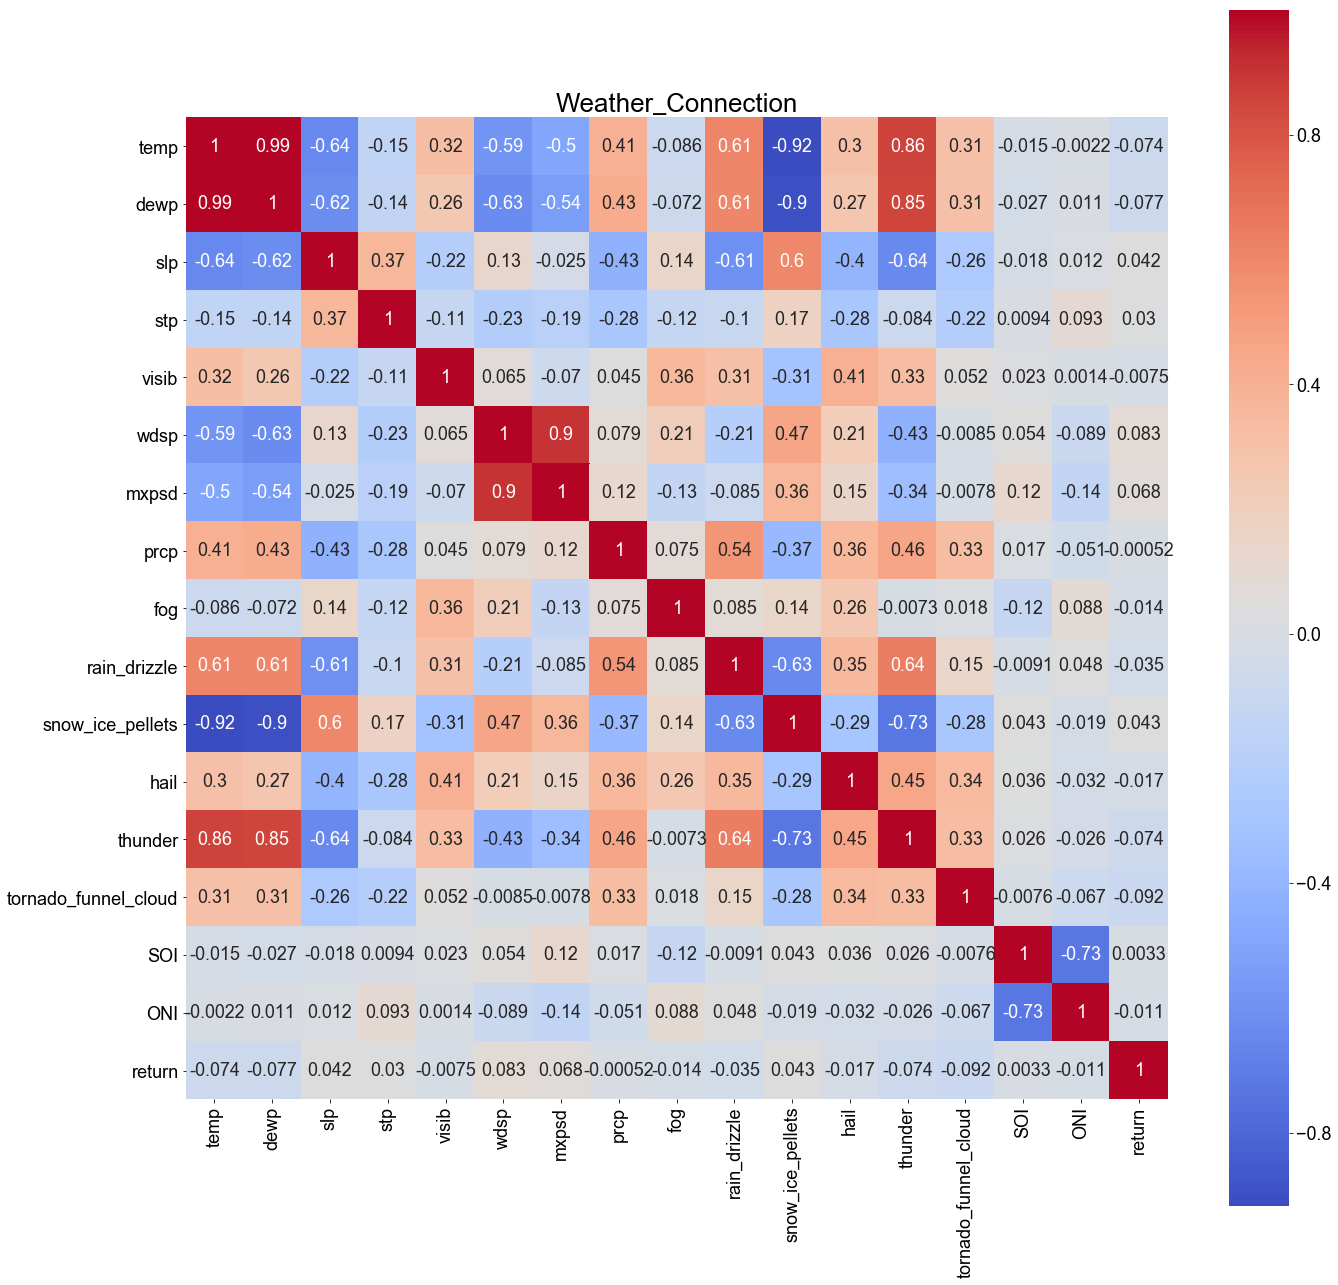

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['figure.figsize'] = (22, 22)
plt.rcParams['font.size']=18

corr = dataset_rmoutliers.iloc[:,:-2].corr()
ax = plt.axes()
sns.heatmap(corr, square=True,vmax=1.0, linecolor='white', annot=True,cmap='coolwarm')
ax.set_title('Weather_Connection',fontsize='x-large')
